<a href="https://colab.research.google.com/github/giovannidispoto/machine-and-deep-learning-playground/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U scikit-learn

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
!unzip /gdrive/MyDrive/diabetes.zip

Archive:  /gdrive/MyDrive/diabetes.zip
  inflating: diabetes.csv            


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
353,1,90,62,12,43,27.2,0.580,24,0
711,5,126,78,27,22,29.6,0.439,40,0
373,2,105,58,40,94,34.9,0.225,25,0
46,1,146,56,0,0,29.7,0.564,29,0
682,0,95,64,39,105,44.6,0.366,22,0


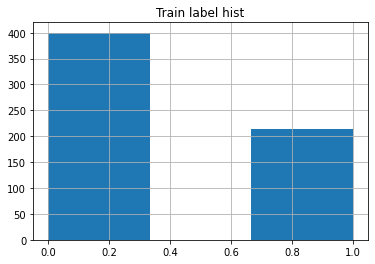

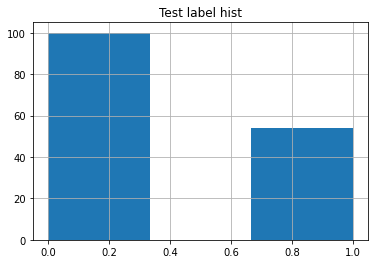

In [28]:
import pandas as pd
import seaborn as sns 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


features = pd.read_csv('diabetes.csv')
labels = features['Outcome']

train, test = train_test_split(features, test_size=0.2, random_state=42, shuffle=True, stratify=labels)
train_outcome = train.Outcome
train_features = train.drop(columns=['Outcome'])

train_features['Insulin'] = train_features['Insulin'] - 1
train_features['SkinThickness'] = train_features['SkinThickness'] - 1
train_features['BMI'] = train_features['BMI'] - 1
train_features['BloodPressure'] = train_features['BloodPressure'] - 1
train_features['Glucose'] = train_features['Glucose'] - 1


test_outcome = test.Outcome
test_features = test.drop(columns=['Outcome'])

#plot histogram train-test
train.hist(column='Outcome', bins=3)
plt.title("Train label hist")

test.hist(column='Outcome', bins=3)
plt.title("Test label hist")

train.head()

In [29]:
train_features.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.819218,119.908795,68.442997,19.776873,77.666124,30.973290,0.477428,33.366450
std,3.314148,31.561093,18.402581,15.856433,107.736572,7.861364,0.330300,11.833438
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.084000,21.000000
25%,1.000000,98.000000,61.500000,-1.000000,-1.000000,26.500000,0.245000,24.000000
50%,3.000000,116.000000,71.000000,22.000000,39.500000,31.300000,0.382500,29.000000
75%,6.000000,139.000000,79.000000,31.000000,129.000000,35.500000,0.639250,41.000000
max,17.000000,198.000000,121.000000,98.000000,743.000000,66.100000,2.329000,81.000000



# Plotting the features



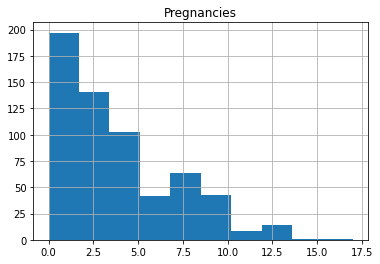

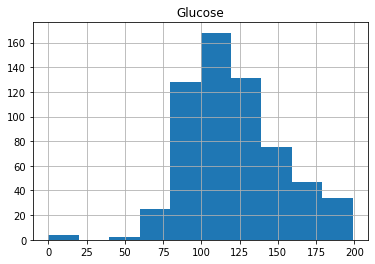

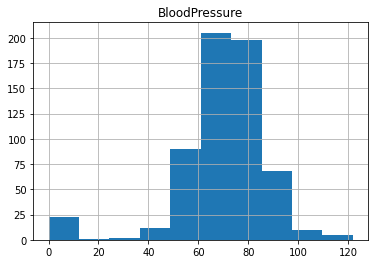

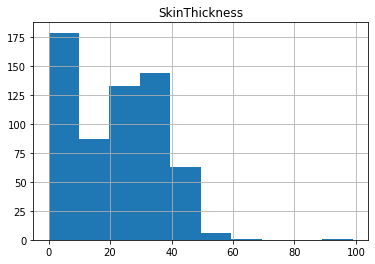

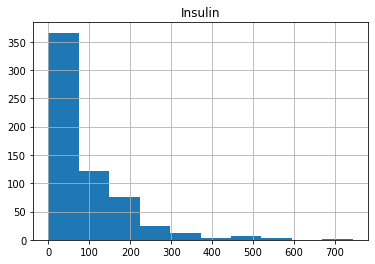

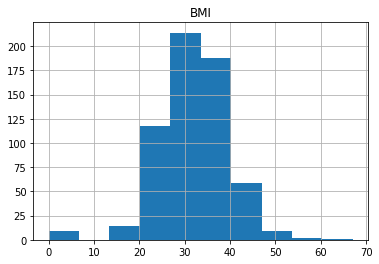

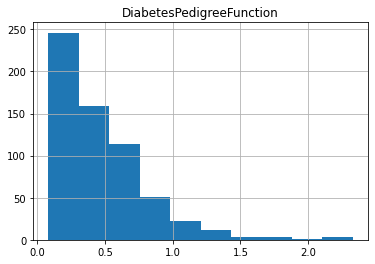

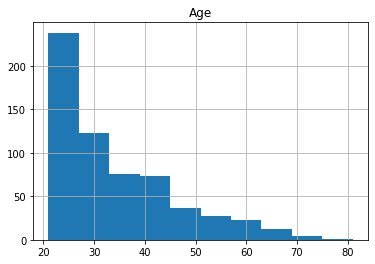

In [30]:
for column in train_features.columns:
  train.hist(column=column)

In [31]:
"Training a Baseline Model"
from sklearn.svm import SVC
svclassifier = SVC(random_state=1234)
svclassifier.fit(train_features,train_outcome)

SVC(random_state=1234)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


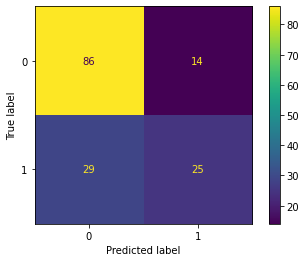

In [32]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svclassifier, test_features , test_outcome)  
plt.show() 

In [33]:
# 2. Standarize data with z-score transformation
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(train_features)
features_list = train_features.columns.tolist()
train_features_zscore = transformer.transform(train_features)
#Transform the numpy array back to a dataframe
train_features = pd.DataFrame(data=train_features_zscore, columns=features_list)

# adapt test set
test_features = transformer.transform(test_features)
test_features = pd.DataFrame(data=test_features, columns=features_list)

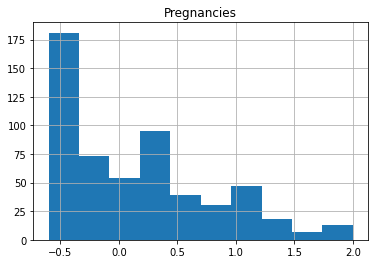

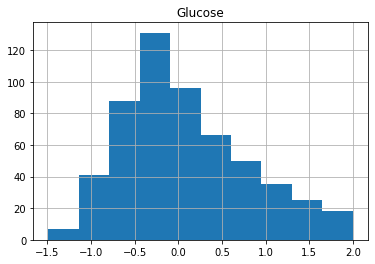

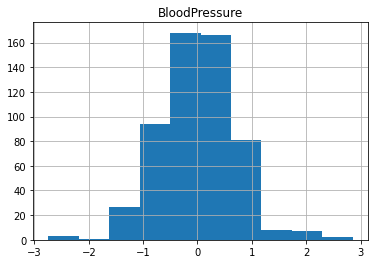

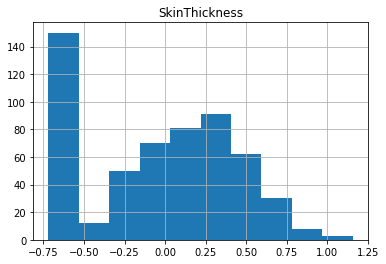

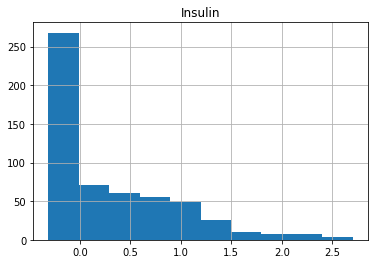

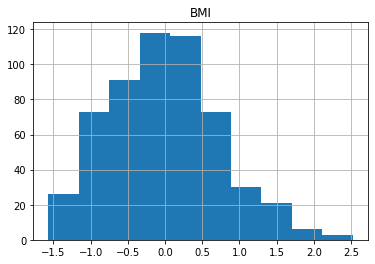

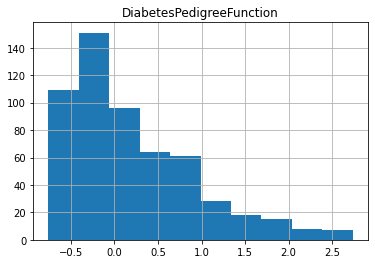

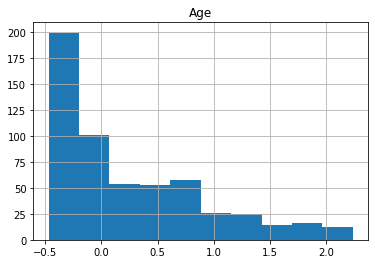

In [34]:
for column in train_features_or.columns:
  train_features_or.hist(column=column)

In [59]:
"Training a Baseline Model"
from sklearn.svm import SVC
svclassifier = SVC(C=1.0,
              kernel='rbf', # linear ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
              degree=6,
              gamma='scale',
              coef0=0.0, 
              shrinking=True,
              probability=False,
              tol=0.001,
              cache_size=200, 
              class_weight=None, # vs balanced
              verbose=False,
              max_iter=- 1,
              decision_function_shape='ovr',
              break_ties=False,
              random_state=1234)
svclassifier.fit(train_features,train_outcome)

SVC(degree=6, random_state=1234)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


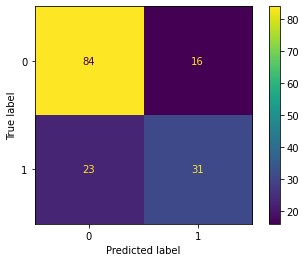

In [60]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svclassifier, test_features , test_outcome)  
plt.show() 

The FN improves a little bit, but the model does not perform that much well.

**Features Selection**

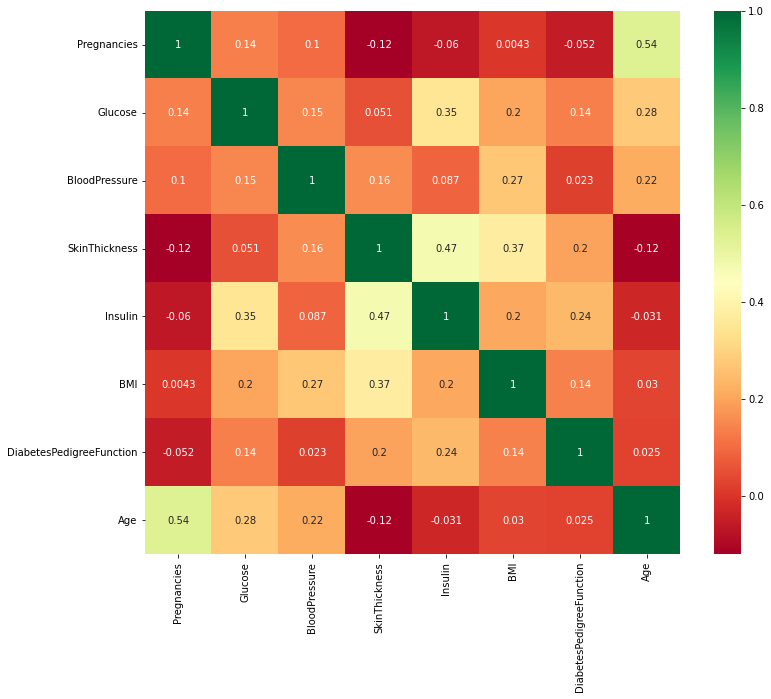

In [61]:
import seaborn as sns

plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(train_features.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [62]:
"Training a Baseline Model"
from sklearn.svm import SVC
svclassifier = SVC(C=1.0,
              kernel='rbf', # linear ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
              degree=6,
              gamma='scale',
              coef0=0.0, 
              shrinking=True,
              probability=False,
              tol=0.001,
              cache_size=200, 
              class_weight=None, # vs balanced
              verbose=False,
              max_iter=- 1,
              decision_function_shape='ovr',
              break_ties=False,
              random_state=1234)
svclassifier.fit(train_features.drop(columns=['Pregnancies', 'SkinThickness']),train_outcome)

SVC(degree=6, random_state=1234)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


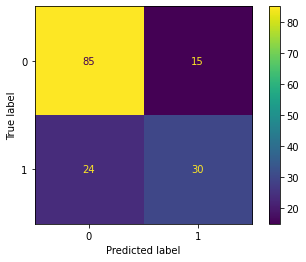

In [63]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svclassifier, test_features.drop(columns=['Pregnancies', 'SkinThickness']) , test_outcome)  
plt.show() 

In [73]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(random_state=1234, class_weight='balanced')
randomForest.fit(train_features.drop(columns=['Pregnancies', 'SkinThickness']), train_outcome)

RandomForestClassifier(class_weight='balanced', random_state=1234)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


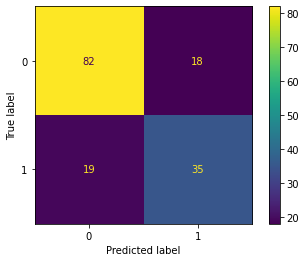

In [74]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(randomForest, test_features.drop(columns=['Pregnancies', 'SkinThickness']), test_outcome)  
plt.show() 

In [66]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=1234)
ada.fit(train_features.drop(columns=['Pregnancies', 'SkinThickness']), train_outcome)

AdaBoostClassifier(random_state=1234)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


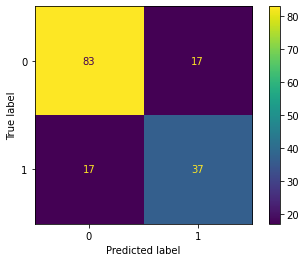

In [67]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(ada, test_features.drop(columns=['Pregnancies', 'SkinThickness']), test_outcome)  
plt.show() 

In [68]:
from sklearn.metrics import classification_report
print(classification_report(test_outcome, svclassifier.predict(test_features.drop(columns=['Pregnancies', 'SkinThickness']))))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       100
           1       0.67      0.56      0.61        54

    accuracy                           0.75       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.74      0.75      0.74       154



In [69]:
from sklearn.metrics import classification_report
print(classification_report(test_outcome, randomForest.predict(test_features.drop(columns=['Pregnancies', 'SkinThickness']))))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       100
           1       0.66      0.65      0.65        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



In [70]:
from sklearn.metrics import classification_report
print(classification_report(test_outcome, ada.predict(test_features.drop(columns=['Pregnancies', 'SkinThickness']))))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       100
           1       0.69      0.69      0.69        54

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154

